In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv(r'D:\Users\Nadeem\Documents\Documents_DriveC_work\GitHub\Kaggle-Competition-Solutions\Classification with an Academic Success Dataset\data\train.csv')
print(df.columns)
df.head()

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


# Feature Importance

In [8]:
# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [11]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

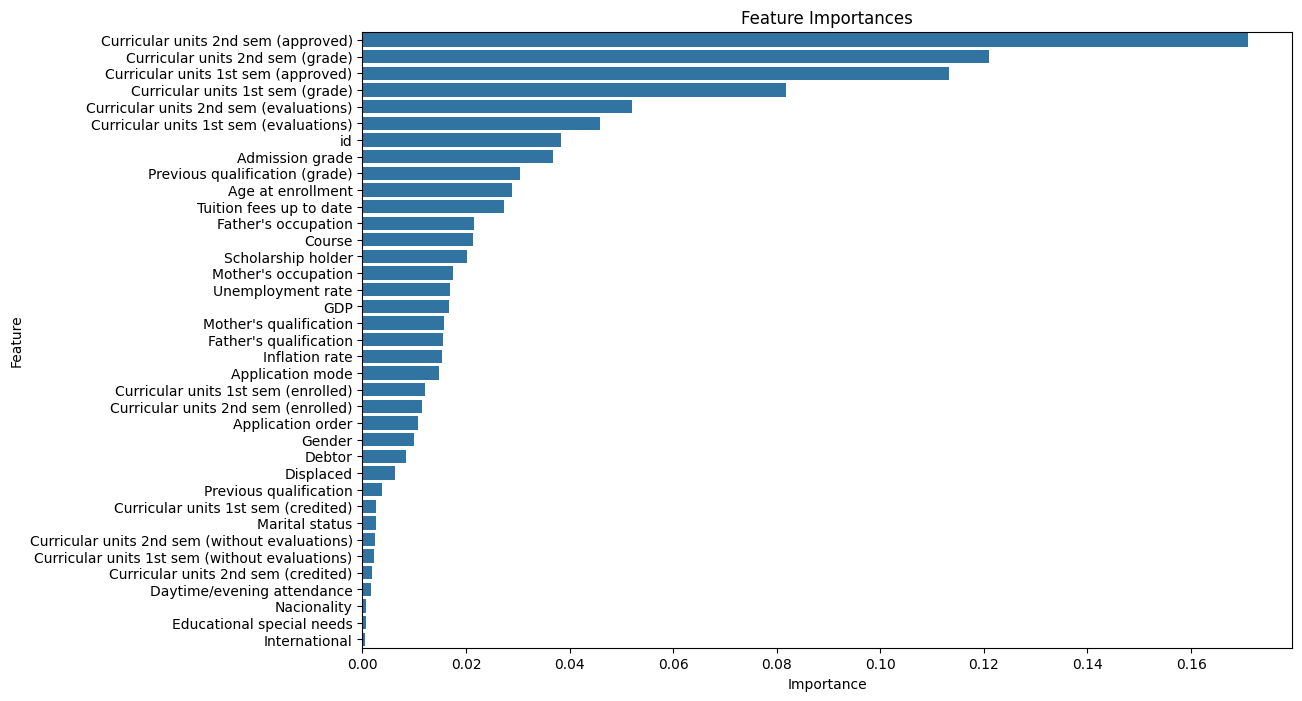

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Feature Correlation

In [15]:
le = LabelEncoder()
df['Target_Encoded'] = le.fit_transform(df['Target'])

In [16]:
corr_matrix = df.drop(columns=['Target']).corr()

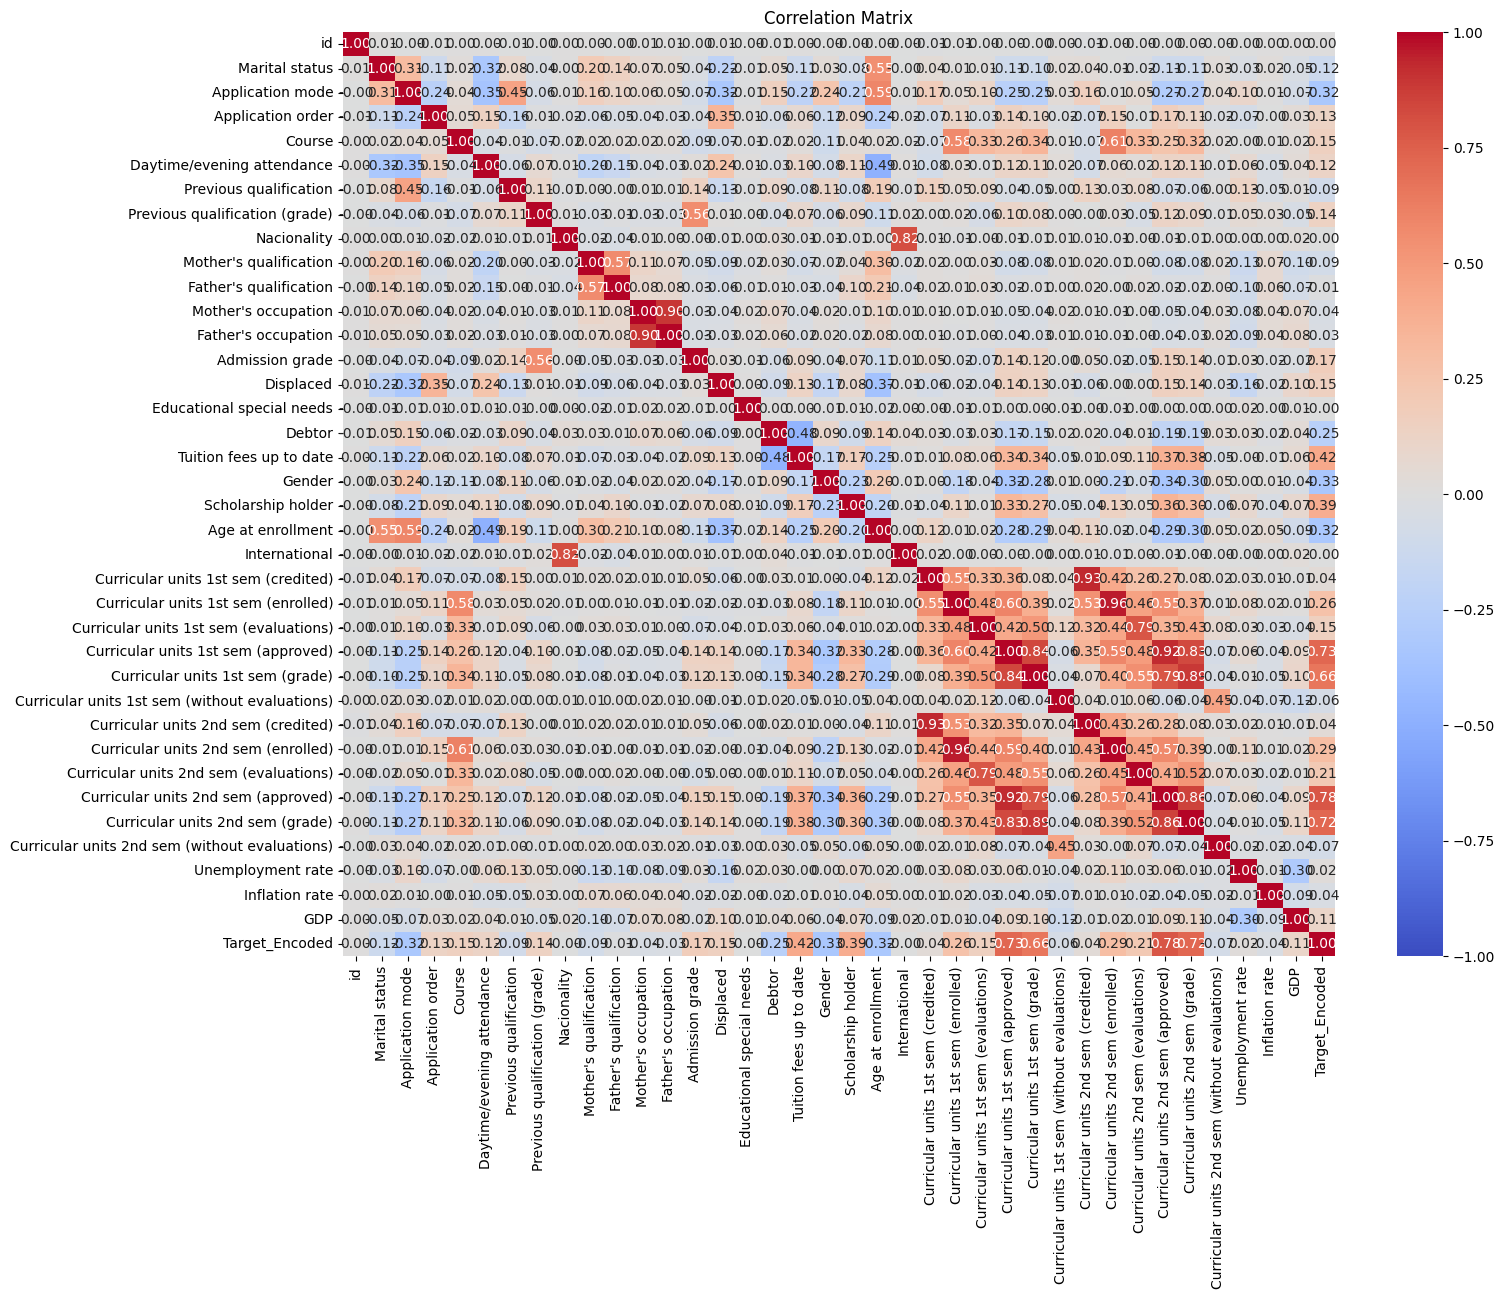

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Checking Outliers

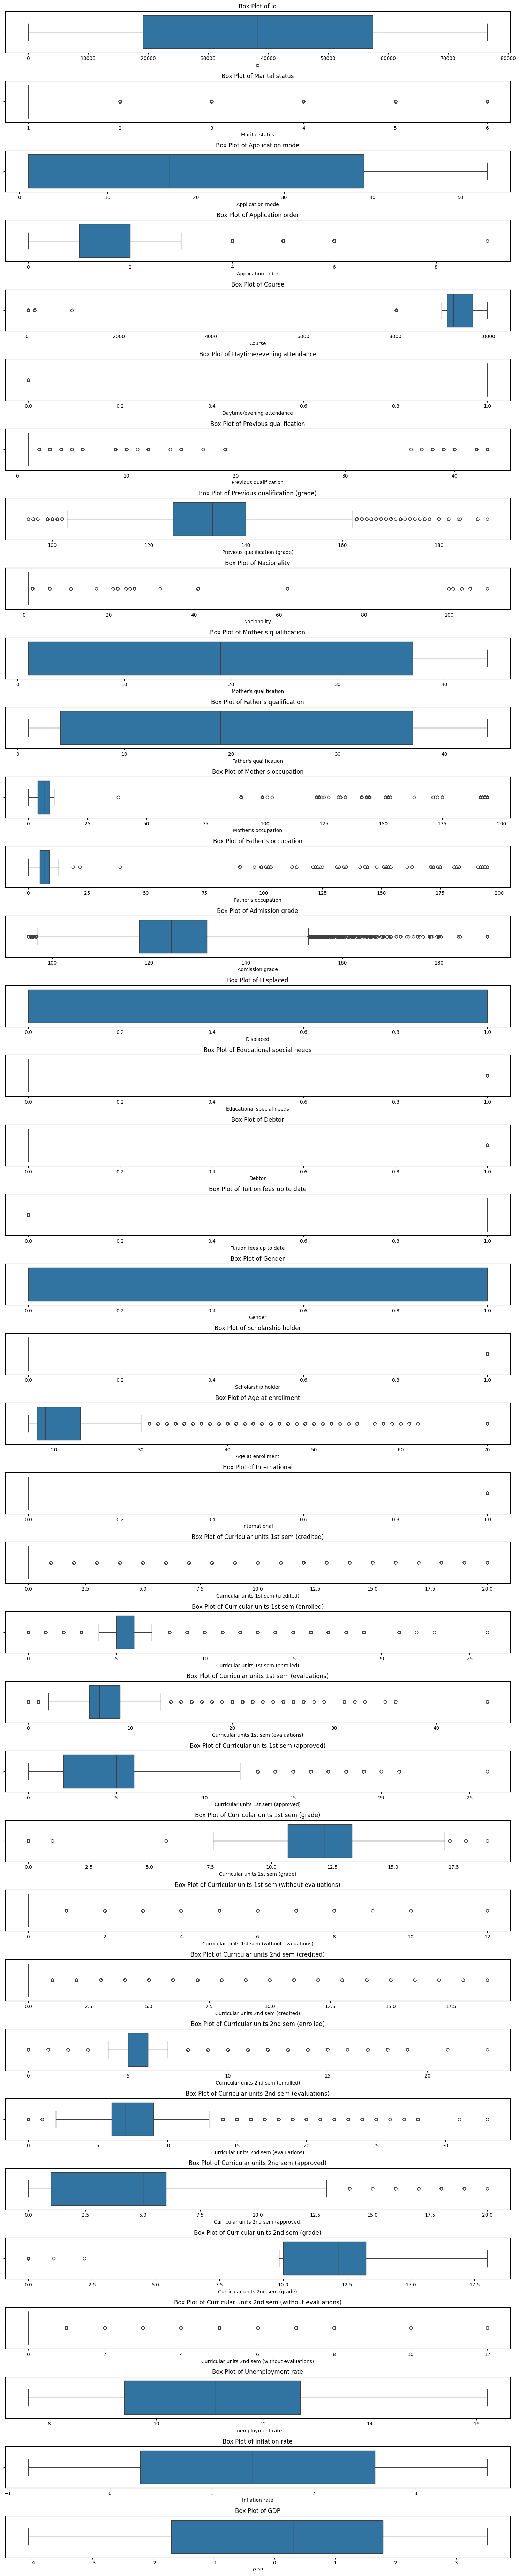

In [18]:
# Visualize each feature with box plots
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numeric_columns) * 2))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [20]:
from scipy import stats

# Calculate Z-scores for each feature
z_scores = stats.zscore(df[numeric_columns])

# Set a threshold for identifying outliers (3 or -3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

outlier_counts = pd.DataFrame(outliers, columns=numeric_columns).sum()
print(outlier_counts)

id                                                   0
Marital status                                    1033
Application mode                                     0
Application order                                 1948
Course                                            2933
Daytime/evening attendance                        6480
Previous qualification                            3497
Previous qualification (grade)                     450
Nacionality                                        421
Mother's qualification                               0
Father's qualification                               0
Mother's occupation                               1659
Father's occupation                               1681
Admission grade                                    375
Displaced                                            0
Educational special needs                          286
Debtor                                            5462
Tuition fees up to date                              0
Gender    

# Drop Less Important Features with High Outliers

In [21]:
# Convert outlier counts to a DataFrame
outlier_counts_df = pd.DataFrame(outlier_counts, columns=['Outliers']).reset_index()
outlier_counts_df = outlier_counts_df.rename(columns={'index': 'Feature'})

print(outlier_counts_df)

                                           Feature  Outliers
0                                               id         0
1                                   Marital status      1033
2                                 Application mode         0
3                                Application order      1948
4                                           Course      2933
5                       Daytime/evening attendance      6480
6                           Previous qualification      3497
7                   Previous qualification (grade)       450
8                                      Nacionality       421
9                           Mother's qualification         0
10                          Father's qualification         0
11                             Mother's occupation      1659
12                             Father's occupation      1681
13                                 Admission grade       375
14                                       Displaced         0
15                      

In [22]:
# Merge the feature importances and outlier counts DataFrame
combined_df = pd.merge(feature_importances, outlier_counts_df, on='Feature')

print(combined_df)

                                           Feature  Importance  Outliers
0              Curricular units 2nd sem (approved)    0.171015       142
1                 Curricular units 2nd sem (grade)    0.121001         0
2              Curricular units 1st sem (approved)    0.113185       293
3                 Curricular units 1st sem (grade)    0.081817         0
4           Curricular units 2nd sem (evaluations)    0.052075       407
5           Curricular units 1st sem (evaluations)    0.045780       541
6                                               id    0.038363         0
7                                  Admission grade    0.036720       375
8                   Previous qualification (grade)    0.030346       450
9                                Age at enrollment    0.028801      2442
10                         Tuition fees up to date    0.027396         0
11                             Father's occupation    0.021593      1681
12                                          Course 

In [23]:
# Define thresholds for outliers and feature importance
outliers_threshold = 1000
importance_threshold = 0.01

# Identify features to drop
features_to_drop = combined_df[
    (combined_df['Outliers'] > outliers_threshold) & 
    (combined_df['Importance'] < importance_threshold)
]['Feature']

# Drop features from the original DataFrame
df_cleaned = df.drop(columns=features_to_drop)

# Print the dropped features
print("Dropped features:", features_to_drop.tolist())

Dropped features: ['Debtor', 'Previous qualification', 'Curricular units 1st sem (credited)', 'Marital status', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Daytime/evening attendance']


In [24]:
df_cleaned

,id,Application mode,Application order,Course,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target,Target_Encoded
0,0,1,1,9238,126.0,1,1,19,5,5,...,14.500000,6,7,6,12.428571,11.1,0.6,2.02,Graduate,2
1,1,17,1,9238,125.0,1,19,19,9,9,...,11.600000,6,9,0,0.000000,11.1,0.6,2.02,Dropout,0
2,2,17,2,9254,137.0,1,3,19,2,3,...,0.000000,6,0,0,0.000000,16.2,0.3,-0.92,Dropout,0
3,3,1,3,9500,131.0,1,19,3,3,2,...,12.591250,8,11,7,12.820000,11.1,0.6,2.02,Enrolled,1
4,4,1,2,9500,132.0,1,19,37,4,9,...,12.933333,7,12,6,12.933333,7.6,2.6,0.32,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,17,1,9254,121.0,1,19,1,7,5,...,10.666667,6,8,5,10.600000,13.9,-0.3,0.79,Graduate,2
76514,76514,1,6,9254,125.0,1,1,38,4,9,...,13.000000,6,9,6,13.875000,9.4,-0.8,-3.12,Graduate,2
76515,76515,17,1,9085,138.0,1,37,37,9,10,...,12.500000,5,8,5,11.400000,9.4,-0.8,-3.12,Enrolled,1
76516,76516,1,3,9070,136.0,1,38,37,5,9,...,0.000000,6,0,0,0.000000,7.6,2.6,0.32,Dropout,0


# Machine Learning

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

In [27]:
# Separate features and target
X = df_cleaned.drop(columns=['Target', 'Target_Encoded'])
y = df_cleaned['Target_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Defining multiple models and training them

In [28]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    # Store results
    results[model_name] = {
        'CV Mean Accuracy': np.mean(cv_scores),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Print results
results_df = pd.DataFrame(results).T
print(results_df)

                     CV Mean Accuracy  Test Accuracy  Precision    Recall  \
Logistic Regression          0.813114       0.821485   0.818827  0.821485   
Random Forest                0.819854       0.827845   0.825865  0.827845   
Gradient Boosting            0.822804       0.831591   0.830571  0.831591   
XGBoost                      0.824372       0.835947   0.834737  0.835947   

                     F1 Score   ROC AUC  
Logistic Regression  0.818313  0.922855  
Random Forest        0.825360  0.929037  
Gradient Boosting    0.829889  0.933993  
XGBoost              0.834299  0.935635  


## Selecting the best model and fine-tuning it

In [29]:
# Select the best model based on initial evaluation
best_model_name = results_df['Test Accuracy'].idxmax()
best_model = models[best_model_name]

# Hyperparameter tuning using GridSearchCV
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")

# Train the final model with best parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


## Final Evaluation

In [30]:
# Final evaluation metrics
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred, average='weighted')
final_recall = recall_score(y_test, y_pred, average='weighted')
final_f1 = f1_score(y_test, y_pred, average='weighted')
final_roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test), multi_class='ovr')

# Print final evaluation metrics
print(f"Final Model ({best_model_name}) Evaluation Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 Score: {final_f1:.4f}")
print(f"ROC AUC: {final_roc_auc:.4f}")

Final Model (XGBoost) Evaluation Metrics:
Accuracy: 0.8351
Precision: 0.8338
Recall: 0.8351
F1 Score: 0.8334
ROC AUC: 0.9372


# Predictions on Test Data

In [31]:
test_df = pd.read_csv(r"D:\Users\Nadeem\Documents\Documents_DriveC_work\GitHub\Kaggle-Competition-Solutions\Classification with an Academic Success Dataset\data\test.csv")
test_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [32]:
# Apply the same data preprocessing steps
test_df_cleaned = test_df.drop(columns=features_to_drop)

# Normalize numerical features
X_test_final = scaler.transform(test_df_cleaned)

In [33]:
# Predict using the final model
y_test_pred = final_model.predict(X_test_final)

# Decode the target variable if needed
y_test_pred_decoded = le.inverse_transform(y_test_pred)

In [34]:
prediction_results = pd.DataFrame({
    'id': test_df['id'],
    'Target': y_test_pred_decoded
})

prediction_results.to_csv('predictions.csv', index=False)

# Training XGBoost on entire dataset

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df_cleaned.drop(columns=['Target', 'Target_Encoded', 'id']))
y_train = df_cleaned['Target_Encoded']

xgb_model = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=300)
xgb_model.fit(X_train, y_train)

X_test_final = test_df_cleaned.drop(columns=['id'])

y_test_pred = xgb_model.predict(X_test_final)

y_test_pred_decoded = le.inverse_transform(y_test_pred)

prediction_results = pd.DataFrame({
    'id': test_df['id'],
    'Target': y_test_pred_decoded
})

prediction_results.to_csv('predictions_3.csv', index=False)

In [38]:
prediction_results['Target'].value_counts() # prediction_2.csv has 82% accuracy on Kaggle, trained on 100% of train data

Target
Graduate    27267
Dropout     16062
Enrolled     7683
Name: count, dtype: int64

In [47]:
prediction_results['Target'].value_counts() # prediction_3.csv has 61% accuracy on Kaggle, it removed id as a column

Target
Dropout     29414
Graduate    21502
Enrolled       96
Name: count, dtype: int64

In [39]:
pred_df = pd.read_csv('predictions.csv') # prediction.csv has 81% accuracy on Kaggle, trained on 70% of train data
pred_df['Target'].value_counts()

Target
Graduate    27326
Dropout     16630
Enrolled     7056
Name: count, dtype: int64

# Further Investigation

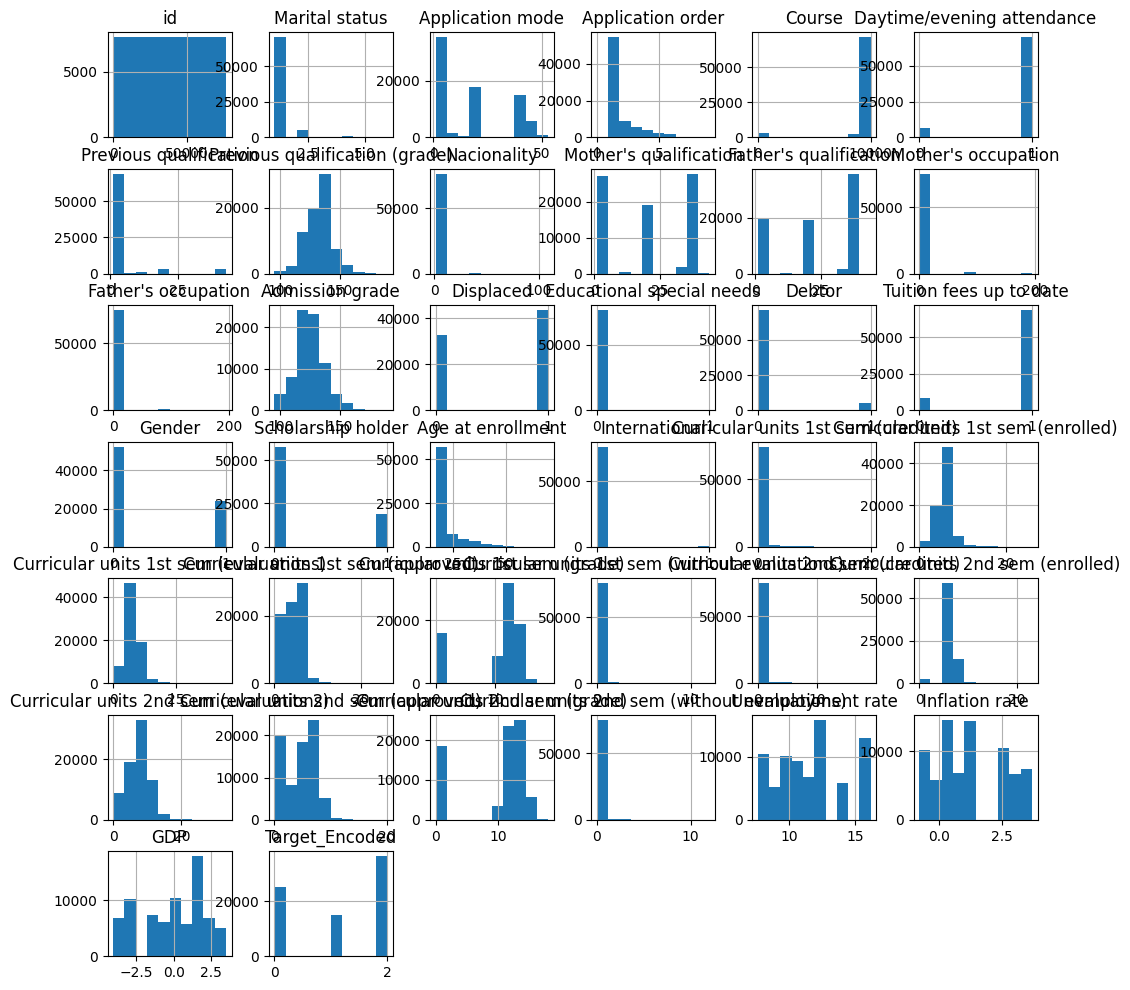

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 12))
plt.show()

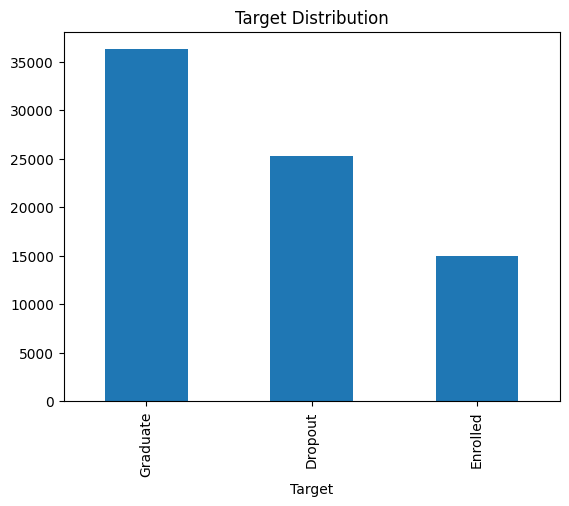

In [48]:
df['Target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.show()

# Catering data imbalance

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Drop columns based on previous analysis
df_cleaned = df.drop(columns=features_to_drop)

# Separate features and target
X = df_cleaned.drop(columns=['Target', 'Target_Encoded', 'id'])
y = df_cleaned['Target_Encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost model with SMOTE
xgb_model_smote = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=300)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Predict using the final model
y_test_pred_smote = xgb_model_smote.predict(X_test)

# Decode the target variable
y_test_pred_smote_decoded = le.inverse_transform(y_test_pred_smote)

# Evaluate the model
final_accuracy_smote = accuracy_score(y_test, y_test_pred_smote)
final_precision_smote = precision_score(y_test, y_test_pred_smote, average='weighted')
final_recall_smote = recall_score(y_test, y_test_pred_smote, average='weighted')
final_f1_smote = f1_score(y_test, y_test_pred_smote, average='weighted')
final_roc_auc_smote = roc_auc_score(y_test, xgb_model_smote.predict_proba(X_test), multi_class='ovr')

# Print final evaluation metrics
print(f"Final Model (XGBoost with SMOTE) Evaluation Metrics:")
print(f"Accuracy: {final_accuracy_smote:.4f}")
print(f"Precision: {final_precision_smote:.4f}")
print(f"Recall: {final_recall_smote:.4f}")
print(f"F1 Score: {final_f1_smote:.4f}")
print(f"ROC AUC: {final_roc_auc_smote:.4f}")

test_df_cleaned = test_df.drop(columns=features_to_drop)

X_test_final = test_df_cleaned.drop(columns=['id'])

X_test_final = scaler.transform(X_test_final)

y_test_final_pred = xgb_model_smote.predict(X_test_final)

y_test_final_pred_decoded = le.inverse_transform(y_test_final_pred)

prediction_results = pd.DataFrame({
    'id': test_df['id'],
    'Target': y_test_final_pred_decoded
})

# Save the results to a CSV file
prediction_results.to_csv('predictions_4.csv', index=False)

Final Model (XGBoost with SMOTE) Evaluation Metrics:
Accuracy: 0.8351
Precision: 0.8340
Recall: 0.8351
F1 Score: 0.8336
ROC AUC: 0.9369


In [51]:
prediction_results['Target'].value_counts() # prediction_4.csv has 83.2% accuracy on Kaggle, trained on 80% of train data

Target
Graduate    26202
Dropout     15344
Enrolled     9466
Name: count, dtype: int64

### Successful approach, training the model with the same approach on complete data

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Drop columns based on previous analysis
df_cleaned = df.drop(columns=features_to_drop)

# Separate features and target
X = df_cleaned.drop(columns=['Target', 'Target_Encoded', 'id'])
y = df_cleaned['Target_Encoded']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Train XGBoost model with SMOTE
xgb_model_smote = xgb.XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=300)
xgb_model_smote.fit(X_train_smote, y_train_smote)

test_df_cleaned = test_df.drop(columns=features_to_drop)

X_test_final = test_df_cleaned.drop(columns=['id'])

X_test_final = scaler.transform(X_test_final)

y_test_final_pred = xgb_model_smote.predict(X_test_final)

y_test_final_pred_decoded = le.inverse_transform(y_test_final_pred)

prediction_results = pd.DataFrame({
    'id': test_df['id'],
    'Target': y_test_final_pred_decoded
})

# Save the results to a CSV file
prediction_results.to_csv('predictions_5.csv', index=False)

In [53]:
prediction_results['Target'].value_counts() # prediction_5.csv has 83.5% accuracy on Kaggle, trained on 100% of train data

Target
Graduate    26221
Dropout     15324
Enrolled     9467
Name: count, dtype: int64